(540, 2500) (540,)


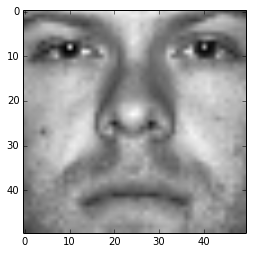

In [3]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
file = open('./faces/train.txt')
for line in file:
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print train_data.shape, train_labels.shape
plt.imshow(train_data[4, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [11]:
print train_labels[4]

1


(100, 2500) (100,)


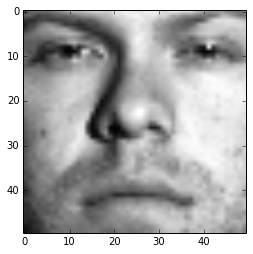

In [7]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print test_data.shape, test_labels.shape
plt.imshow(test_data[4, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [19]:
print test_labels[4]

1


In [8]:
avgFace = np.mean(train_data,axis=0)
avgFace.shape

(2500,)

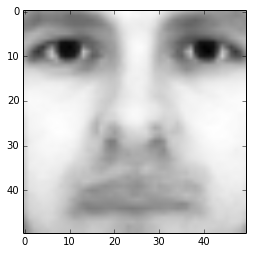

In [9]:
plt.imshow(avgFace.reshape(50,50), cmap = cm.Greys_r)
plt.show()

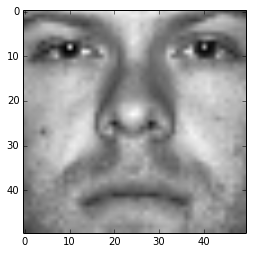

In [10]:
train_data_new = train_data-avgFace
plt.imshow(train_data[4].reshape(50,50), cmap = cm.Greys_r)
plt.show()

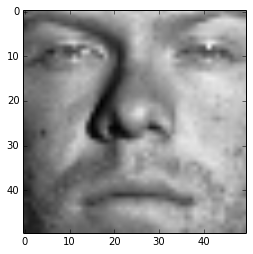

In [11]:
test_data_new = test_data-avgFace
plt.imshow(test_data_new[4].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [13]:
from scipy import linalg

In [14]:
U,S,Vtr = linalg.svd(train_data_new)

In [45]:
S

array([  4.42379211e+04,   4.07583002e+04,   1.60162541e+04,
         1.10706041e+04,   8.65960697e+03,   7.97744786e+03,
         7.33441673e+03,   7.09251924e+03,   6.60396260e+03,
         5.68014485e+03,   5.42607146e+03,   5.15817010e+03,
         5.01855064e+03,   4.74890672e+03,   4.42953757e+03,
         4.17430587e+03,   4.09328924e+03,   3.98138334e+03,
         3.83127794e+03,   3.72989075e+03,   3.70807333e+03,
         3.60630775e+03,   3.37605166e+03,   3.31892608e+03,
         3.23944116e+03,   3.20333633e+03,   3.09714190e+03,
         3.05726743e+03,   2.98187060e+03,   2.87219331e+03,
         2.76877652e+03,   2.74054667e+03,   2.61788294e+03,
         2.54069799e+03,   2.52652733e+03,   2.50592293e+03,
         2.36273062e+03,   2.33858670e+03,   2.30597195e+03,
         2.29557073e+03,   2.21624973e+03,   2.18998205e+03,
         2.12193383e+03,   2.09968631e+03,   2.08226220e+03,
         2.06220257e+03,   2.01114208e+03,   1.98738859e+03,
         1.94696876e+03,

In [15]:
V.shape

NameError: name 'V' is not defined

In [16]:
Vtr.shape

(2500, 2500)

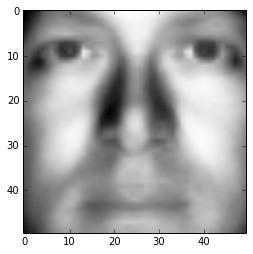

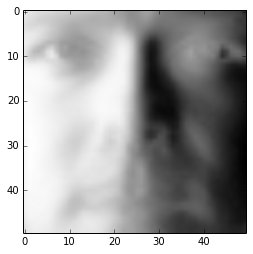

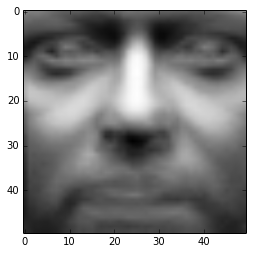

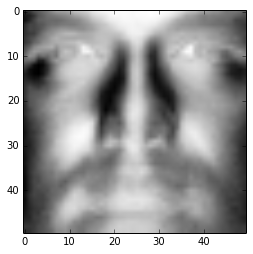

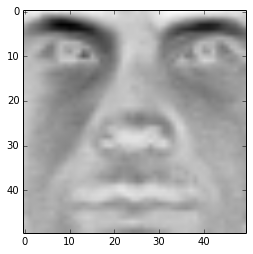

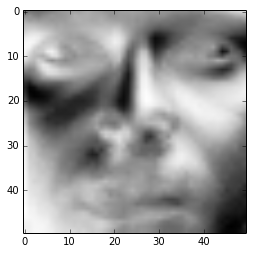

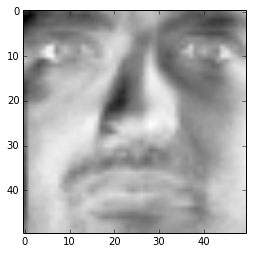

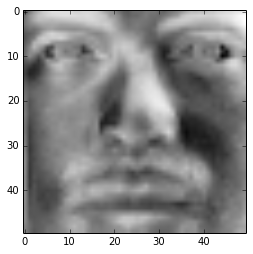

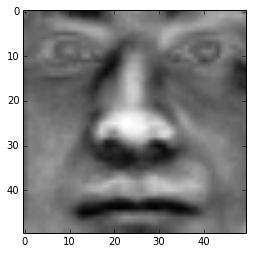

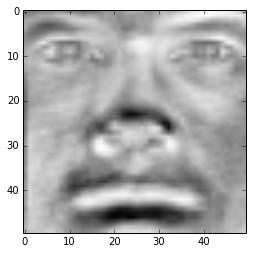

In [17]:
for i in range(0,10):
    plt.imshow(Vtr[i].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

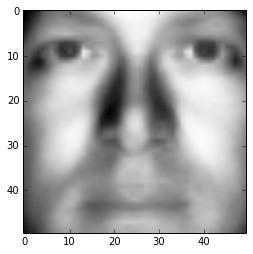

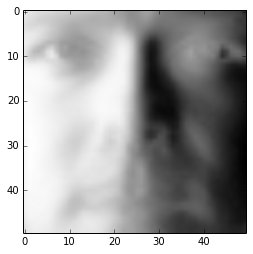

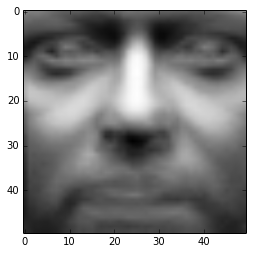

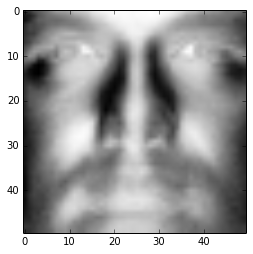

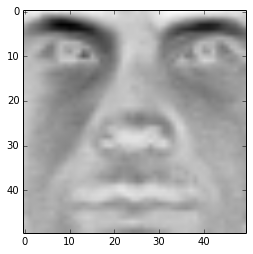

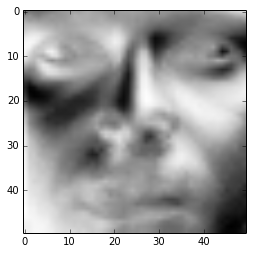

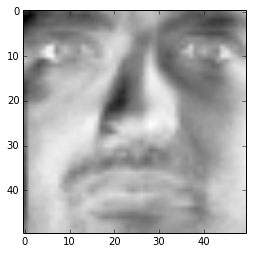

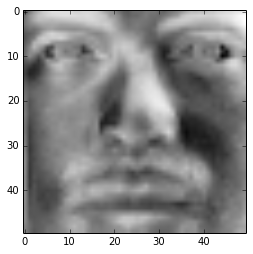

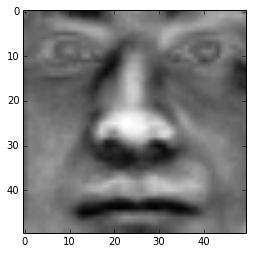

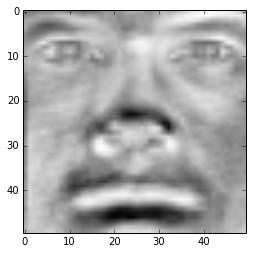

In [48]:
for i in range(0,10):
    plt.imshow(Vtr[i].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

In [51]:
print Vtr[10]

[-0.01655157 -0.04242232 -0.05506321 ...,  0.00789575  0.0080074
  0.01758723]


In [58]:
(S[:10]*np.eye(10)).shape

(10, 10)

In [18]:
Xr=[]
norm = np.zeros(200)
for r in range(1,201):
    Xr = np.dot(np.dot(U[:,:r],(S[:r]*np.eye(r))),Vtr[:r,:])
    norm[r-1] = np.linalg.norm(train_data_new-Xr)
 

In [83]:
norm.shape

(200,)

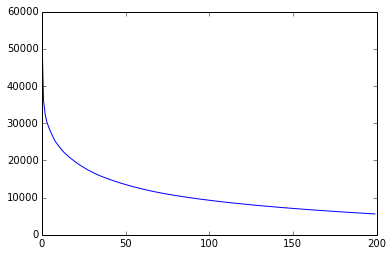

In [19]:
plt.plot(norm)

In [20]:
def reduceFeatures(train_data,test_data,Vtr,r):
    F_train = np.dot(train_data_new,Vtr[:r,:].transpose())
    F_test = np.dot(test_data_new,Vtr[:r,:].transpose())
    return (F_train,F_test)

In [21]:
from sklearn import preprocessing, datasets, linear_model
accuracy = np.zeros(200)

for r in range(1,201):

    F_train,F_test = reduceFeatures(train_data,test_data,Vtr,r)
    cls = linear_model.LogisticRegression()
    cls.fit(F_train, train_labels)
    accuracy[r-1] =  cls.score(F_test, test_labels)
    

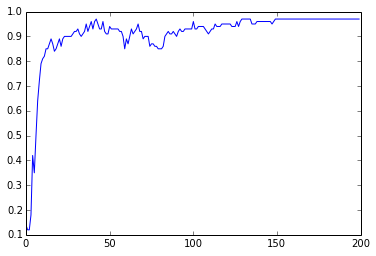

In [22]:
plt.plot(accuracy)

In [23]:
accuracy[199]

0.96999999999999997

In [24]:
accuracy[9]

0.79000000000000004